In [1]:
%%capture
%cd ..

In [2]:
import pandas as pd
from utils import constants as cs
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('dataset/cleaned/charge-CS2_35.csv')

# plt.plot(df['Step_Time(s)'], df['Voltage(V)'])
# plt.xlabel('Tempo (s)')
# plt.ylabel('Tensione (V)')
# plt.title('Plot di Voltage rispetto al Tempo')
# plt.show()

In [4]:
# # Seleziona solo le righe con Cycle_Index pari a 50, 150 e 250
# selected_cycles = df[df['Cycle_Index'].isin([50, 150, 250])]

# # Fai il plot
# plt.figure(figsize=(10, 6))  # Specifica le dimensioni della figura (opzionale)
# for cycle, group in selected_cycles.groupby('Cycle_Index'):
#     plt.plot(group['Step_Time(s)'], group['Voltage(V)'], label=f'Cycle {cycle}')

# plt.xlabel('Tempo (s)')
# plt.ylabel('Tensione (V)')
# plt.title('Plot di Voltage rispetto al Tempo per Cycle 50, 150 e 250')
# plt.legend()  # Aggiungi la legenda
# plt.show()

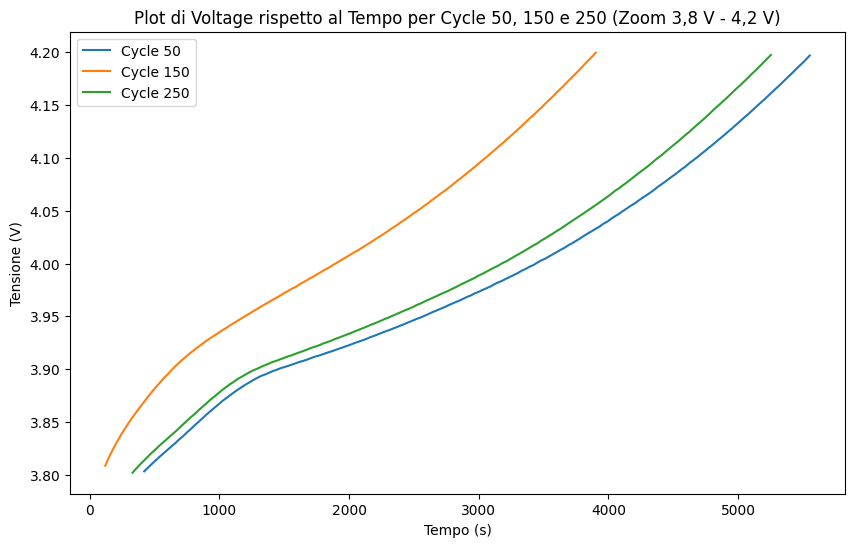

In [56]:
# Seleziona solo le righe con Cycle_Index pari a 50, 150 e 250 e Step_Index pari a 2
selected_cycles = df[(df['Cycle_Index'].isin([50, 150, 250])) & (df['Step_Index'] == 2)]

# Filtra ulteriormente per tensioni comprese tra 3.8 V e 4.2 V
selected_cycles = selected_cycles[(selected_cycles['Voltage(V)'] >= 3.8) & (selected_cycles['Voltage(V)'] <= 4.2)]

# Fai il plot
plt.figure(figsize=(10, 6))  # Specifica le dimensioni della figura (opzionale)
for cycle, group in selected_cycles.groupby('Cycle_Index'):
    plt.plot(group['Step_Time(s)'], group['Voltage(V)'], label=f'Cycle {cycle}')

plt.xlabel('Tempo (s)')
plt.ylabel('Tensione (V)')
plt.title('Plot di Voltage rispetto al Tempo per Cycle 50, 150 e 250 (Zoom 3,8 V - 4,2 V)')
plt.legend()  # Aggiungi la legenda
plt.show()


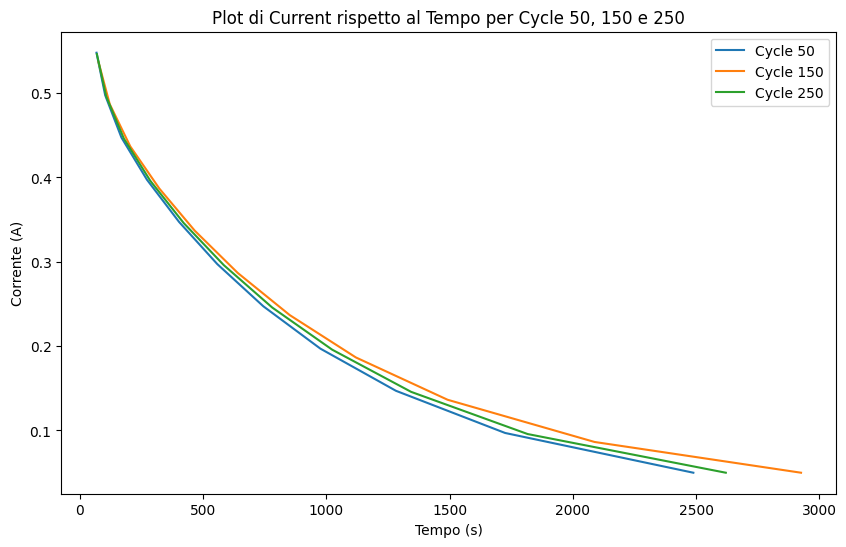

In [60]:
# Seleziona solo le righe con Cycle_Index pari a 50, 150 e 250 e Step_Index pari a 2
selected_cycles = df[(df['Cycle_Index'].isin([50, 150, 250])) & (df['Step_Index'] == 4)]

# Filtra ulteriormente per tensioni comprese tra 3.8 V e 4.2 V
selected_cycles = selected_cycles[(selected_cycles['Current(A)'] >= 0.0) & (selected_cycles['Current(A)'] <= 1.5)]

# Fai il plot
plt.figure(figsize=(10, 6))  # Specifica le dimensioni della figura (opzionale)
for cycle, group in selected_cycles.groupby('Cycle_Index'):
    plt.plot(group['Step_Time(s)'], group['Current(A)'], label=f'Cycle {cycle}')

plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')
plt.title('Plot di Current rispetto al Tempo per Cycle 50, 150 e 250')
plt.legend()  # Aggiungi la legenda
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponendo che il tuo DataFrame sia chiamato df

# Seleziona solo le righe con Cycle_Index pari a 50, 150 e 250 e Step_Index pari a 2
selected_cycles = df[(df['Cycle_Index'].isin([50, 150, 250]))]

# Filtra ulteriormente per tensioni comprese tra 3.8 V e 4.2 V
selected_cycles = selected_cycles[(selected_cycles['Voltage(V)'] >= 3.8) & (selected_cycles['Voltage(V)'] <= 4.2)]

# Identifica gli indici di riga in cui Step_Index passa da 2 a 4 per ciascun ciclo
transition_indices = selected_cycles[selected_cycles['Step_Index'].diff() == 2].index

# Aggiungi una colonna 'Adjusted_Step_Time' che tiene traccia della somma degli Step_Time(s) successivi a Step_Index 4
selected_cycles['Adjusted_Step_Time'] = 0

for idx in transition_indices:
    cycle_mask = selected_cycles['Cycle_Index'] == selected_cycles.at[idx, 'Cycle_Index']
    selected_cycles.loc[cycle_mask, 'Adjusted_Step_Time'] = selected_cycles[cycle_mask]['Step_Time(s)'].shift(-1).cumsum()

# Fai il plot
plt.figure(figsize=(10, 6))  # Specifica le dimensioni della figura (opzionale)
for cycle, group in selected_cycles.groupby('Cycle_Index'):
    plt.plot(group['Step_Time(s)'] + group['Adjusted_Step_Time'], group['Voltage(V)'], label=f'Cycle {cycle}')

plt.xlabel('Tempo (s)')
plt.ylabel('Tensione (V)')
plt.title('Plot di Voltage rispetto al Tempo per Cycle 50, 150 e 250 (Zoom 3,8 V - 4,2 V)')
plt.legend()  # Aggiungi la legenda
plt.show()
